# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: /content/Bus_Breakdown_and_Delays.csv
100% 34.4M/34.4M [00:00<00:00, 99.6MB/s]


## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [ ]:
data = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')
data

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age


In [ ]:
data.sample(5)

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
129199,2016-2017,1350766,Special Ed AM Run,GT1467,Y888,Heavy Traffic,07454,05/19/2017 01:50:00 PM,05/19/2017 01:52:00 PM,NaN,...,20 MINTUES,0,Yes,Yes,Yes,05/19/2017 01:52:00 PM,NaN,05/19/2017 01:52:47 PM,Running Late,School-Age
41709,2015-2016,1261938,Pre-K/EI,1227,LP-1,Heavy Traffic,C157,04/12/2016 08:20:00 AM,04/12/2016 08:26:00 AM,Brooklyn,...,20 MIN,10,Yes,Yes,No,04/12/2016 08:26:00 AM,NaN,04/12/2016 08:26:45 AM,Running Late,Pre-K
137012,2016-2017,1358828,Special Ed AM Run,1411,M947,Heavy Traffic,"02444,02991",06/19/2017 06:44:00 AM,06/19/2017 06:45:00 AM,Manhattan,...,30 MINS,0,Yes,Yes,No,06/19/2017 06:45:00 AM,NaN,06/19/2017 06:45:17 AM,Running Late,School-Age
87077,2016-2017,1307827,Special Ed AM Run,VN24648,X376,Other,11012,12/13/2016 07:37:00 AM,12/13/2016 07:43:00 AM,Bronx,...,15mins,10,Yes,Yes,Yes,12/13/2016 07:43:00 AM,NaN,12/13/2016 07:43:57 AM,Running Late,School-Age
2168,2015-2016,1216626,Special Ed AM Run,4129,K267,Other,19089,09/22/2015 07:13:00 AM,09/22/2015 07:47:00 AM,Brooklyn,...,45 MINS,0,Yes,Yes,No,09/22/2015 07:47:00 AM,NaN,09/22/2015 08:51:12 AM,Running Late,School-Age


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Busbreakdown_ID,147972.0,1.287779e+06,43243.382164,1212681.0,1250437.75,1287843.5,1325191.25,1362605.0
Number_Of_Students_On_The_Bus,147972.0,3.590071e+00,55.365859,0.0,0.00,0.0,4.00,9007.0


In [ ]:
data.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [ ]:
data.duplicated().sum()

0

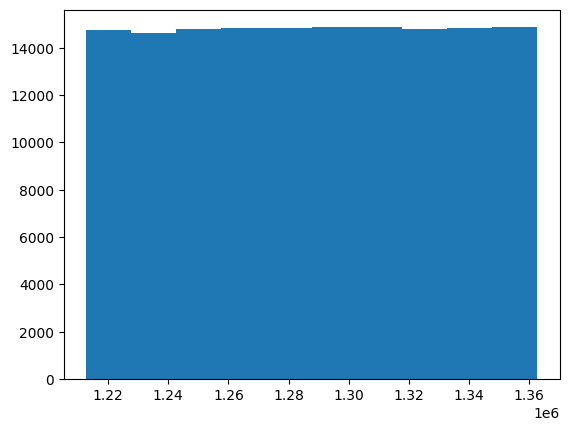

In [ ]:
plt.hist(data['Busbreakdown_ID'])
plt.show()

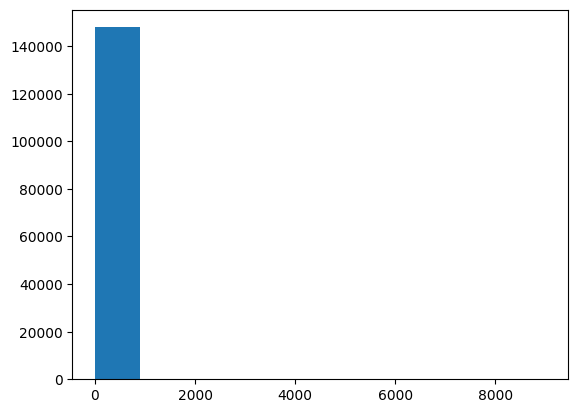

In [ ]:
plt.hist(data['Number_Of_Students_On_The_Bus'])
plt.show()

In [ ]:
cat_col = data.select_dtypes(include='object').columns

for col in cat_col:
    print(data[col].value_counts())

School_Year
2016-2017    83141
2015-2016    63184
2017-2018     1646
2019-2020        1
Name: count, dtype: int64
Run_Type
Special Ed AM Run          85990
Pre-K/EI                   20951
Special Ed PM Run          17672
General Ed AM Run          17182
General Ed PM Run           4541
Special Ed Field Trip        628
General Ed Field Trip        570
Project Read PM Run          300
Project Read AM Run           47
Project Read Field Trip        2
Name: count, dtype: int64
Bus_No
9354     468
357      465
9302     434
118      357
9320     349
        ... 
20133      1
1140D      1
553D       1
160D       1
K9345      1
Name: count, Length: 10765, dtype: int64
Route_Number
1         2569
2         2217
3         1904
5         1740
4         1093
          ... 
26Q7MD       1
M688         1
JC-1         1
W656         1
1409B        1
Name: count, Length: 11283, dtype: int64
Reason
Heavy Traffic                  87426
Other                          21666
Mechanical Problem            

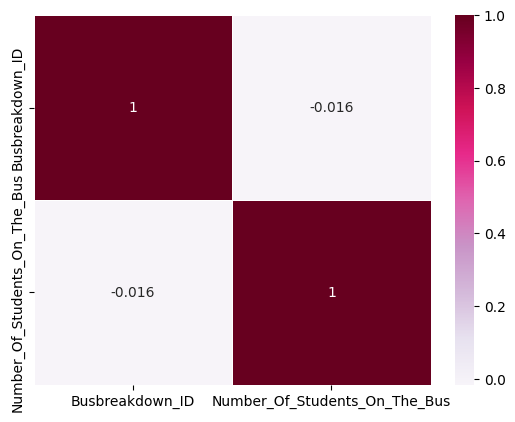

In [ ]:
num_col = ['Busbreakdown_ID','Number_Of_Students_On_The_Bus']

corr_matrix = data[num_col].corr()

sns.heatmap(corr_matrix, annot=True, cmap='PuRd', linewidths=0.5)
plt.show()

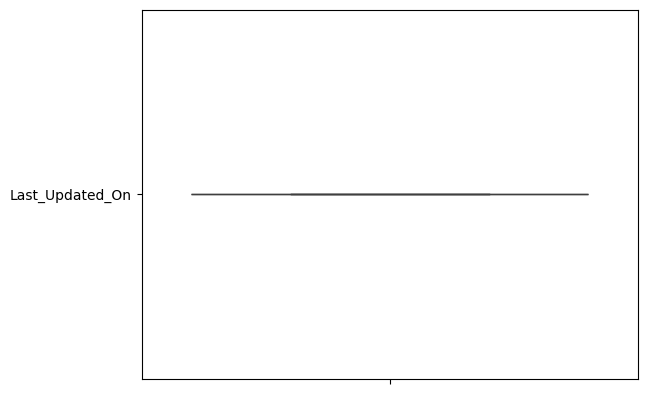

In [ ]:
sns.boxplot('Last_Updated_On')
plt.show()

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [ ]:
data = data.drop(columns=['How_Long_Delayed','Incident_Number'])

In [ ]:
data['Run_Type'].fillna('Special Ed AM Run', inplace=True)
data['Route_Number'].fillna('1', inplace=True)
data['Reason'].fillna('Heavy Traffic', inplace=True)
data['Boro'].fillna('Bronx', inplace=True)

In [ ]:
data.isnull().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,0


In [ ]:
data.shape

(5064, 19)

In [ ]:
# List of categorical columns to encode
cat_col = data.select_dtypes(include='object').columns

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in cat_col:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
data.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,Bus_Company_Name,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
1375,0,1225377,0,217,0,0,765,4284,4422,0,0,0,1,1,1,4422,4570,1,0
1842,0,1216474,0,418,0,0,42,4037,4170,0,5,8,1,1,1,4170,4316,1,0
2587,0,1226096,0,921,0,0,173,4296,4435,0,13,5,1,0,1,4435,4582,1,0
3153,0,1226288,0,651,0,0,480,4298,4436,0,16,8,1,1,1,4436,4584,1,0
3367,0,1213115,0,34,0,0,281,3962,4093,0,15,1,1,1,1,4093,4239,1,0


## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [ ]:
data.columns

Index(['School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Last_Updated_On',
       'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

In [ ]:
X = data.drop(columns=['Breakdown_or_Running_Late','Bus_No'])
y = data['Breakdown_or_Running_Late']

In [ ]:
X.shape, y.shape

((5064, 17), (5064,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4051, 17), (4051,), (1013, 17), (1013,))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [ ]:
model = Sequential()

model.add(Dense(units=17, input_dim=X_train.shape[1], kernel_initializer='uniform',activation='relu'))

model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=8, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 17)                  │             306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 8)                   │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 531 (2.07 KB)

 Trainable params: 531 (2.07 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10 ,validation_split=0.2)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8969 - loss: 0.6085 - val_accuracy: 0.9988 - val_loss: 0.2176
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9998 - loss: 0.1537 - val_accuracy: 0.9988 - val_loss: 0.0198
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: 0.0182 - val_accuracy: 0.9988 - val_loss: 0.0139
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9995 - loss: 0.0082 - val_accuracy: 0.9988 - val_loss: 0.0144
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9994 - loss: 0.0111 - val_accuracy: 0.9988 - val_loss: 0.0153
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9997 - loss: 0.0028 - val_accuracy: 0.9988 - val_loss: 0.0164
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9998 - loss: 0.0026 - val_accuracy: 0.9988 - val_loss: 0.0173
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9994 - loss: 0.0092 - val_accuracy: 0.

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
model.evaluate(X_test, y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 8.1389e-05 


[8.47337651066482e-05, 1.0]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:
y_pred = model.predict(X_test)
y_pred

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[1.        ],
       [1.        ],
       [0.99993026],
       ...,
       [0.99982256],
       [0.99998975],
       [0.9998219 ]], dtype=float32)

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

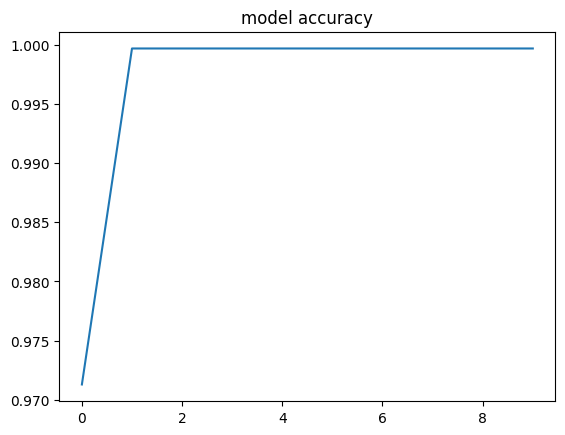

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')

plt.show()

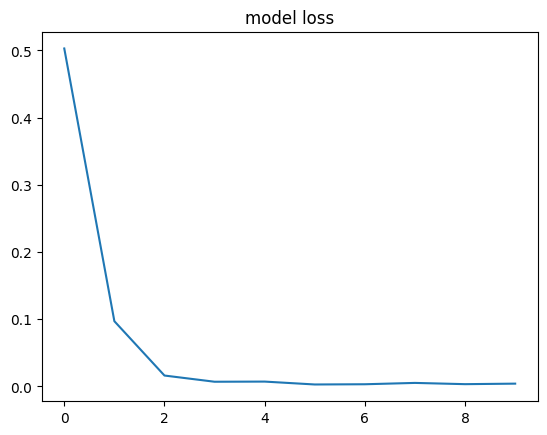

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')

plt.show()

## Save the Model
Save the trained model for submission.

In [ ]:
model.save("best_model.h5")

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

1- i used label encoder to encode all categorical columns insted of using one hot encode it's better to my data because all categorical columns contain groups inside it.

2- Started with simple ANN and if need add more layers to make ANN complex, but in my case i don't need to complex my model so i do it simple.

3- when i start training the model i don't use dropout layer and the result upper to me so high and the curve in loss and accuracy is so bad but after i add dropout layer and change the number of batch size from 10 to 32 the model work better.

4- binary_crossentropy because my target class is binary and i use model evaluate with my classification task.

8- if the model is overfit we can use Regularization Techniques like l1 or l2 and use dropout and use callback (learning rate schedule, early stopping)